![x-files](Thexfiles.jpg)

In this example, [API guardian](https://open-platform.theguardian.com) documentation is used, which can be viewed at the following link.

https://open-platform.theguardian.com/documentation/

Example of API request:

https://content.guardianapis.com/search?q=debate%20AND%20economy&tag=politics/politics&from-date=2014-01-01&api-key=test

In [4]:
import requests
import json

In [5]:
api_url = 'http://content.guardianapis.com/#/search?q=Ukraine'
my_key = '1b51187d-aba0-4f00-8215-665a5ec769c6'

In [6]:
payload = {
        'api-key':              my_key,
        'page-size':            200,
        'show-editors-picks':   'true',
        'show-elements':        'image',
        'show-fields':          'all'

}

In [7]:
response = requests.get(api_url, params=payload)

In [8]:
data = response.json()

In [9]:
data

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'editorsPicks': []}}

In [10]:
response.json()

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'editorsPicks': []}}

In [12]:
url = 'https://content.guardianapis.com/search'
payload = {'order-by': 'oldest', 'q': 'UFO', 'api-key': my_key}

In [13]:
payload['page-size'] = 100
payload['page'] = 1

r = requests.get(url, payload)
j = json.loads(r.text)


N = int(j['response']['pages'])

In [14]:
N

13

In [15]:

all = []


for k in range(N):
    payload['page'] = k + 1
    r = requests.get(url, payload)
    j = json.loads(r.text)
    s = j['response']['results']
    all.extend(s)




In [16]:
len(all)


1279

In [17]:
import pandas as pd

In [18]:
df = pd.DataFrame(all)

In [19]:
df['webPublicationDate'] = pd.to_datetime(df['webPublicationDate'])

In [20]:
df.sort_values(by = ['webPublicationDate'], ascending=False)

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
1278,stage/2022/mar/26/phantom-of-the-opera-review-...,article,stage,Stage,2022-03-25 23:44:38+00:00,Phantom of the Opera review – an inventive and...,https://www.theguardian.com/stage/2022/mar/26/...,https://content.guardianapis.com/stage/2022/ma...,False,pillar/arts,Arts
1277,music/2022/mar/19/what-links-machine-gun-kelly...,article,music,Music,2022-03-19 13:00:27+00:00,What links Machine Gun Kelly to François Truff...,https://www.theguardian.com/music/2022/mar/19/...,https://content.guardianapis.com/music/2022/ma...,False,pillar/arts,Arts
1276,lifeandstyle/2022/mar/18/american-song-contest...,article,lifeandstyle,Life and style,2022-03-18 07:00:51+00:00,Eurovision USA: your state-by-state guide to t...,https://www.theguardian.com/lifeandstyle/2022/...,https://content.guardianapis.com/lifeandstyle/...,False,pillar/lifestyle,Lifestyle
1275,travel/2022/feb/24/let-there-not-be-light-a-st...,article,travel,Travel,2022-02-24 07:00:15+00:00,Let there not be light: a stargazing walk in c...,https://www.theguardian.com/travel/2022/feb/24...,https://content.guardianapis.com/travel/2022/f...,False,pillar/lifestyle,Lifestyle
1274,commentisfree/2022/feb/23/the-guardian-view-on...,article,commentisfree,Opinion,2022-02-23 18:44:55+00:00,"The Guardian view on Jan Pieńkowski: funny, fr...",https://www.theguardian.com/commentisfree/2022...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion
...,...,...,...,...,...,...,...,...,...,...,...
4,uk/1999/mar/20/4,article,uk-news,UK news,1999-03-20 04:06:49+00:00,Pity the poor aliens,https://www.theguardian.com/uk/1999/mar/20/4,https://content.guardianapis.com/uk/1999/mar/20/4,False,pillar/news,News
3,society/1999/mar/17/guardiansocietysupplement,article,society,Society,1999-03-17 02:26:08+00:00,Cover stories,https://www.theguardian.com/society/1999/mar/1...,https://content.guardianapis.com/society/1999/...,False,pillar/news,News
2,media/1999/jan/25/tvandradio.television1,article,culture,Culture,1999-01-25 04:17:17+00:00,Watching brief,https://www.theguardian.com/media/1999/jan/25/...,https://content.guardianapis.com/media/1999/ja...,False,pillar/arts,Arts
1,theguardian/1998/dec/31/features11.g2,article,global,Global,1998-12-31 04:21:18+00:00,They came from Kent,https://www.theguardian.com/theguardian/1998/d...,https://content.guardianapis.com/theguardian/1...,False,NaN,NaN


In [21]:
!rm ufo_guardian.db

In [22]:
import sqlite3
conn = sqlite3.connect('ufo_guardian.db')

In [23]:
df.to_sql('ufo_guardian',con = conn)

In [24]:
conn.close()

You can open the saved database using CLI `sqlite3` or `sqlitebrowser`:

![](sqlite2.png)

![Якщо треба - можно звернутись до sqlitebrowser](sqlite1.png)

But we will use the pandas built-in tools:

In [25]:
df.describe(datetime_is_numeric=True)


,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
count,1279,1279,1279,1279,1279,1279,1279,1279,1279,1250,1250
unique,1279,6,39,39,NaN,1233,1279,1279,1,5,5
top,uk/1989/jun/14/2,article,music,Music,NaN,Clubs picks of the week,https://www.theguardian.com/uk/1989/jun/14/2,https://content.guardianapis.com/uk/1989/jun/14/2,False,pillar/arts,Arts
freq,1,1238,221,221,NaN,27,1,1,1279,562,562
mean,NaN,NaN,NaN,NaN,2011-05-07 04:51:33.666145280+00:00,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1989-06-14 10:26:21+00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2007-04-11 05:41:15.500000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2011-05-07 23:06:23+00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2015-12-25 11:13:36.500000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,2022-03-25 23:44:38+00:00,NaN,NaN,NaN,NaN,NaN,NaN


https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html


In [26]:
df[df['sectionId'] == 'news']

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName
27,theguardian/2000/jan/12/correctionsandclarific...,article,news,News,2000-01-12 01:32:02+00:00,Corrections and clarifications,https://www.theguardian.com/theguardian/2000/j...,https://content.guardianapis.com/theguardian/2...,False,pillar/news,News
115,news/2002/may/30/guardianobituaries,article,news,News,2002-05-30 13:41:59+00:00,Obituary: Lord Kimberley,https://www.theguardian.com/news/2002/may/30/g...,https://content.guardianapis.com/news/2002/may...,False,pillar/news,News
193,news/2004/may/20/guardianobituaries1,article,news,News,2004-05-20 01:44:33+00:00,Obituary: Admiral of the Fleet Lord Hill-Norton,https://www.theguardian.com/news/2004/may/20/g...,https://content.guardianapis.com/news/2004/may...,False,pillar/news,News
216,theguardian/2005/jan/31/correctionsandclarific...,article,news,News,2005-01-31 11:04:59+00:00,Corrections and clarifications,https://www.theguardian.com/theguardian/2005/j...,https://content.guardianapis.com/theguardian/2...,False,pillar/news,News
250,news/blog/2005/dec/20/post40,article,news,News,2005-12-20 11:00:04+00:00,"RIP, the man who created Roswell's tourism ind...",https://www.theguardian.com/news/blog/2005/dec...,https://content.guardianapis.com/news/blog/200...,False,pillar/news,News
279,news/observerblog/2006/jul/10/houseparty,article,news,News,2006-07-10 12:00:11+00:00,This old house,https://www.theguardian.com/news/observerblog/...,https://content.guardianapis.com/news/observer...,False,pillar/news,News
492,news/datablog/2009/apr/28/swine-flu-mexico,article,news,News,2009-04-28 12:44:04+00:00,"A little calm about swine flu, please",https://www.theguardian.com/news/datablog/2009...,https://content.guardianapis.com/news/datablog...,False,pillar/news,News
493,news/blog/2009/may/07/northerner-x-files-scarb...,article,news,News,2009-05-07 16:10:12+00:00,The Northerner: The truth is out there (in Yor...,https://www.theguardian.com/news/blog/2009/may...,https://content.guardianapis.com/news/blog/200...,False,pillar/news,News
657,news/2011/jul/13/weatherwatch-flying-saucers,article,news,News,2011-07-13 22:01:01+00:00,Weatherwatch: UFOs or temperature?,https://www.theguardian.com/news/2011/jul/13/w...,https://content.guardianapis.com/news/2011/jul...,False,pillar/news,News
681,news/2011/nov/16/weatherwatch-thunderstorm-met...,article,news,News,2011-11-16 22:30:00+00:00,Weatherwatch: Puzzling phenomena of sky battles,https://www.theguardian.com/news/2011/nov/16/w...,https://content.guardianapis.com/news/2011/nov...,False,pillar/news,News


In [27]:
dn = pd.to_datetime(df['webPublicationDate'])

In [28]:
dn = dn.dt.strftime('%Y')

In [29]:
dn

0       1989
1       1998
2       1999
3       1999
4       1999
        ... 
1274    2022
1275    2022
1276    2022
1277    2022
1278    2022
Name: webPublicationDate, Length: 1279, dtype: object

In [30]:
type(dn)

pandas.core.series.Series

In [31]:
pd.to_datetime(df['webPublicationDate'])[2].year

1999

In [32]:
dp = pd.DataFrame(dn)

In [33]:
dp['number of publications'] = 1

In [34]:
dp

,webPublicationDate,number of publications
0,1989,1
1,1998,1
2,1999,1
3,1999,1
4,1999,1
...,...,...
1274,2022,1
1275,2022,1
1276,2022,1
1277,2022,1


https://stackoverflow.com/questions/30379789/plot-pandas-data-frame-with-year-over-year-data

https://stackoverflow.com/questions/38621652/pandas-pivot-time-series-by-year

In [35]:
import numpy as np
tb = pd.pivot_table(dp, index='webPublicationDate', values='number of publications', aggfunc=np.sum)

In [36]:
tb

,number of publications
webPublicationDate,
1989,1
1998,1
1999,25
2000,43
2001,32
2002,41
2003,39
2004,30
2005,41


<AxesSubplot:xlabel='webPublicationDate'>

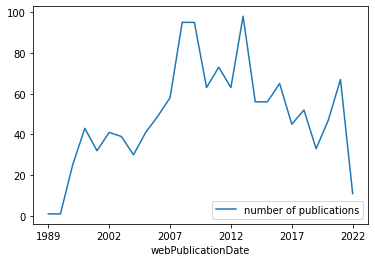

In [37]:
tb.plot()

<AxesSubplot:xlabel='webPublicationDate'>

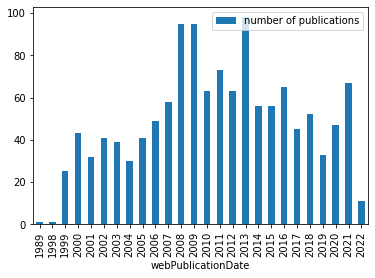

In [38]:
tb.plot.bar()

<AxesSubplot:>

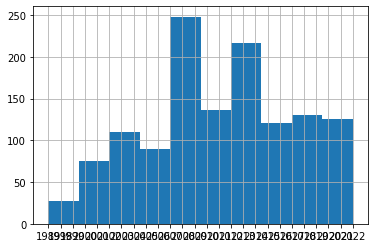

In [39]:
dn.hist()

In [40]:
dp

,webPublicationDate,number of publications
0,1989,1
1,1998,1
2,1999,1
3,1999,1
4,1999,1
...,...,...
1274,2022,1
1275,2022,1
1276,2022,1
1277,2022,1
